1. Lynxdata (2 points)
Lynxes seem to be related to a rather interesting phenomena that we will be examining more later. For now, download a Canadian dataset that describes the number of lynxes by year (the years are in the column 'year' and lynx count in the column 'lynx'). Find out the number of lynxes in the leap years of the 20th-century (1904,  1908,  1912,  1916,  1920,  1924,  1928 and 1932). In other words, write a program that prints out the number of lynxes for each of these years.

In [32]:
import numpy as np
lynx = np.genfromtxt("data/lynx.csv", names = True, delimiter = ",")

In [33]:
lynx_leap = lynx["year"] % 4 == 0 
lynx_1900 = lynx["year"] >= 1900
lynx_1900leap = lynx_leap & lynx_1900
year_1900leap = lynx["year"][lynx_1900leap]
count_1900leap = lynx["lynxcount"][lynx_1900leap]
[(f"The year of {year_1900leap[k]} has {count_1900leap[k]} lynxes") for k in range(len(year_1900leap))]

['The year of 1900.0 has 387.0 lynxes',
 'The year of 1904.0 has 6991.0 lynxes',
 'The year of 1908.0 has 345.0 lynxes',
 'The year of 1912.0 has 2713.0 lynxes',
 'The year of 1916.0 has 3790.0 lynxes',
 'The year of 1920.0 has 108.0 lynxes',
 'The year of 1924.0 has 2432.0 lynxes',
 'The year of 1928.0 has 529.0 lynxes',
 'The year of 1932.0 has 1590.0 lynxes']

2. Lynxplot (2 points)
Make a line plot, with the year on the x-axis and the number of lynxes on the y-axis.

Text(0.5, 1.0, 'The number of lynxes in the leap years after 1900')

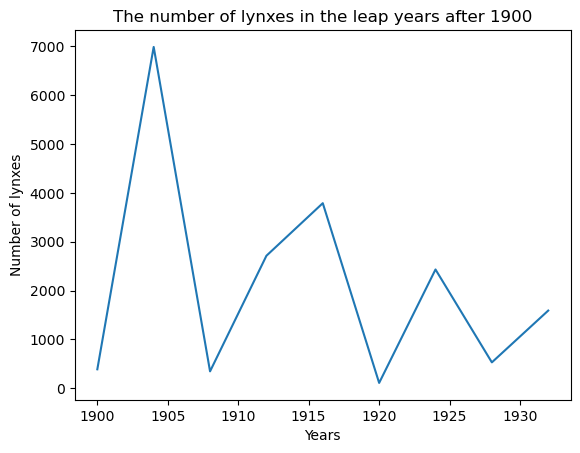

In [51]:
import matplotlib.pyplot as plt
plt.plot(year_1900leap, count_1900leap)
plt.xlabel("Years")
plt.ylabel("Number of lynxes")
plt.title("The number of lynxes in the leap years after 1900")

3. Z-normalization (2 points)
Write a function that z-normalizes a list of numbers. This means that our values are standardized so that the mean of our list is approximately 0 and the standard deviation is approximately 1.  You can do this by subtracting the mean from each value and then diving each result by the sample standard deviation.

You can calculate the mean and standard deviations however you see fit (for example, by using functions from the previous exercise sets or with numpy's pre-existing functions), but try to do the actual z-normalization (substraction by mean and division by sample standard deviation) without loops.

Chk. you can find an example illustration here.

In [35]:
# z-normalization function
def znorm(mylist):
    mylist = np.array(mylist)
    mylist_average = np.average(mylist)
    mylist_std = np.std(mylist)
    mylist_znorm = (mylist - mylist_average)/mylist_std
    return(mylist_znorm)
test = znorm([1,2,3,4,5,6,7])
test_average = np.average(test)
test_std = np.std(test)
print(test_average, test_std)

0.0 1.0


4. Temperature in Helsinki (3 points)
Read a dataset describing the temperatures (in Celsius) of a few different cities in Finland in different seasons.

a) Plot the temperatures of Helsinki summers. The x-axis should have the year and  y-axis the temperature.

b) Calculate the average temperature for each season in Helsinki (i.e. print out the mean average of the seasonal temperatures from 1830-2020, and do this separately for summers, falls, springs, and winters).

c ) Calculate the average temperature of each year in Helsinki (by averaging the spring, summer, fall and winter temperatures of each year).

Hint: You can open the file for example with numpy's genfromtxt function (e.g. data = np.genfromtxt("temperature_stats.csv", names = True, delimiter = ",")). The column names can be read from either the actual file or by saying print(data.dtype).   

In [48]:
temp = np.genfromtxt("data/temperature_stats.csv", names=True, delimiter=",")
temp

array([(1830.,  -8. ,  1.3, 14.5, 6.4,   nan,  nan,  nan, nan,   nan,  nan,  nan,  nan),
       (1831.,  -6.5,  1.5, 16.7, 5.2,   nan,  nan,  nan, nan,   nan,  nan,  nan,  nan),
       (1832.,  -3.1,  2.6, 13.9, 5.3,   nan,  nan,  nan, nan,   nan,  nan,  nan,  nan),
       (1833.,  -3.6,  1. , 14.3, 7.8,   nan,  nan,  nan, nan,   nan,  nan,  nan,  nan),
       (1834.,  -6.2,  3.1, 16.7, 4.6,   nan,  nan,  nan, nan,   nan,  nan,  nan,  nan),
       (1835.,  -2.9,  1.9, 14.2, 5.1,   nan,  nan,  nan, nan,   nan,  nan,  nan,  nan),
       (1836.,  -7.1,  3.5, 13.3, 5. ,   nan,  nan,  nan, nan,   nan,  nan,  nan,  nan),
       (1837.,  -4.6,  1.1, 15. , 5.9,   nan,  nan,  nan, nan,   nan,  nan,  nan,  nan),
       (1838., -10. , -0.3, 14.6, 6. ,   nan,  nan,  nan, nan,   nan,  nan,  nan,  nan),
       (1839.,  -4.7,  0.4, 16. , 5.7,   nan,  nan,  nan, nan,   nan,  nan,  nan,  nan),
       (1840.,  -7.7,  0.6, 14.2, 5. ,   nan,  nan,  nan, nan,   nan,  nan,  nan,  nan),
       (1841.,  -8.5,

(1830.0, 2020.0)

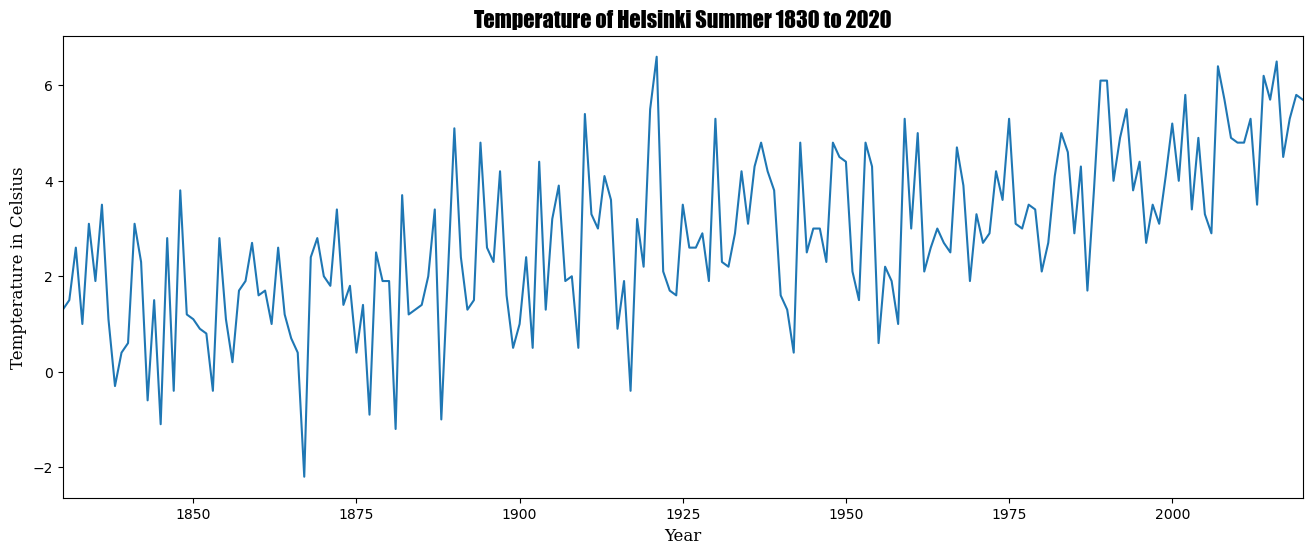

In [57]:
font1 = {'family':'fantasy','color':'black','size':16}
font2 = {'family':'serif','color':'black','size':12}
font3 = {'family':'cursive','color':'black','size':20}

plt.figure(figsize=(16,6))
plt.plot(temp["Year"],temp['HelsinkiSpring'])
plt.xlabel("Year", fontdict=font2)
plt.ylabel("Tempterature in Celsius", fontdict=font2)
plt.title("Temperature of Helsinki Summer 1830 to 2020", fontdict=font1)
plt.xlim(1830,2020)

In [60]:
temp_spring = np.around(np.average(temp["HelsinkiSpring"]),3)
temp_summer = np.around(np.average(temp["HelsinkiSummer"]),3)
temp_fall = np.around(np.average(temp["HelsinkiFall"]),3)
temp_winter = np.around(np.average(temp["HelsinkiWinter"]),3)
print(f"The average temperature for spring is {temp_spring} Celsius \n The average temperature for summer is {temp_summer} Celsius \n The average temperature for fall is {temp_fall} Celsius \n The average temperature for winter is {temp_winter} Celsius")


The average temperature for spring is 2.796 Celsius 
 The average temperature for summer is 15.721 Celsius 
 The average temperature for fall is 6.012 Celsius 
 The average temperature for winter is -4.758 Celsius


In [ ]:
temp_yearmean = (
    temp["HelsinkiSpring"]+
    temp["HelsinkiSummer"]+
    temp["HelsinkiFall"]+
    temp["HelsinkiWinter"])/4
 
temp_yearmean = np.around(temp_yearmean, 2)
 
[(f"The year of {temp_year[k]} has an average temperature of {temp_yearmean[k]} Celsius") for k in range(len(temp_year))]

5.  Closer look at Helsinki temperatures (2 points)
Find the years when the Helsinki spring temperature is above the average spring temperature of the whole time-period (1830-2020). Plot a graph showing the spring temperature of each years as a line plot. Highlight (with red dots for example) the years when the spring temperature is higher than average of the time period. The result should look something like this:



In [ ]:
temp_springmean = np.mean(temp["HelsinkiSpring"])